# Pymaceuticals Inc.
---

### Analysis

- From what I have concluded the Capomulin drug regimen compared to the other drug regimens, Ramicane also showed results very similar to Capomulin. Both having the highest timepoints compared to the rest of the others and the lowest tumor voloume compared to the others. 
- As for the others, Ceftamin and Infubinol had a very high tumor volume average of 60 whereas the other two only were 35-40. 
- Males and females were also very even which showed the experiment to be more accurate as sex did not affect the data, although 1 mouse was duplicated. 
- As the line graph shows the treatment of the mouse, it takes at least 20 days for the treatment to be in affect. As tumor volume is still rising until 20 days when it starts to falls off. 
- There is a strong relation to Weight and Tumor Volume as well shown in the scatter plot. Proving that as the mouse gets heavier there are strong signs of a higher tumor volume. 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice.
number_of_mice = mouse_study_df["Mouse ID"].value_counts()
len(number_of_mice)


249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice_df)==False]

clean_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [51]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
len(clean_mice)

249

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_Tumor_Volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Tumor_Volume_Std_Dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Tumor_Volume_Std_Err = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

frame_df = pd.DataFrame({
    'Mean Tumor Volume': Mean_Tumor_Volume,
    'Median Tumor Volume': Median_Tumor_Volume,
    'Tumor Volume Variance': Tumor_Volume_Variance,
    'Tumor Volume Std. Dev.': Tumor_Volume_Std_Dev,
    'Tumor Volume Std. Err.': Tumor_Volume_Std_Err
})
frame_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean ='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
agg_df    
    

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

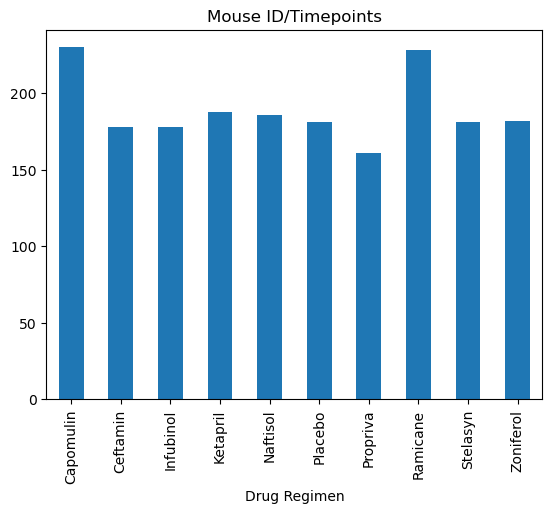

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Regimen = clean_df.groupby('Drug Regimen')

num_timepoints = Drug_Regimen['Timepoint'].count()

mouse_timepoint = num_timepoints.plot(kind="bar", title="Mouse ID/Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

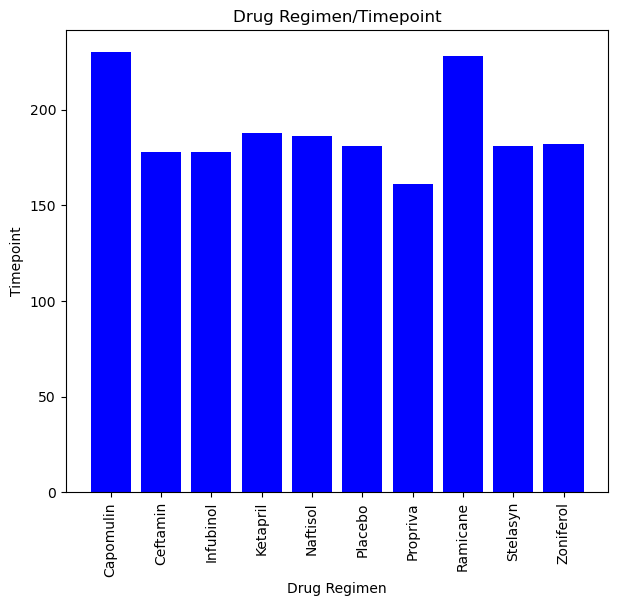

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regimen = clean_df.groupby('Drug Regimen').count()

x_axis = Drug_Regimen.index
y_values = Drug_Regimen["Timepoint"]

plt.figure(figsize=(7, 6))
plt.bar(x_axis, y_values, color="blue", align="center", alpha=1)
plt.xticks(rotation=90) 
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.title('Drug Regimen/Timepoint')
plt.show

<Axes: ylabel='count'>

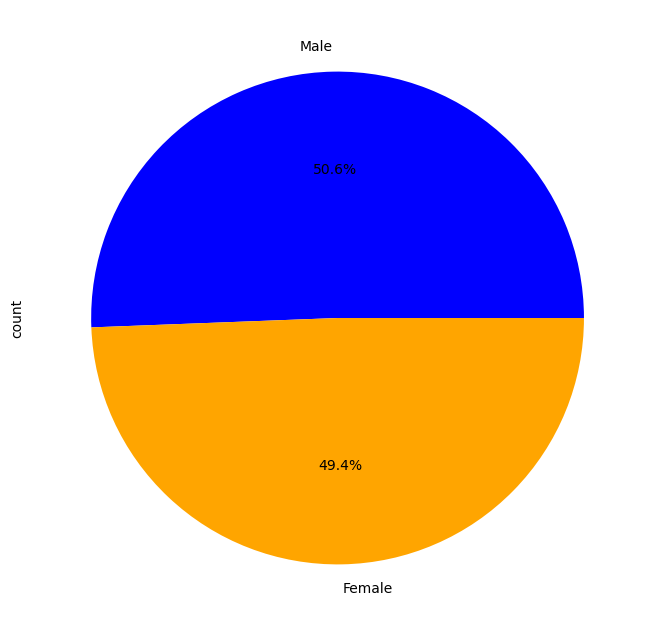

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = mouse_study_df["Sex"].value_counts()
sex_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['blue', 'orange'])

([<matplotlib.patches.Wedge at 0x12807157460>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

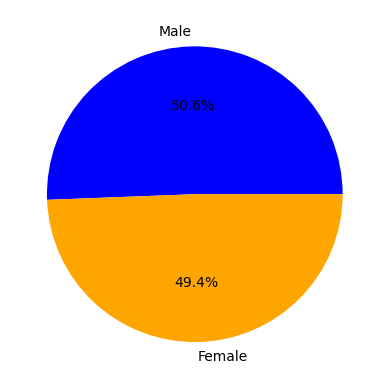

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = mouse_study_df["Sex"].value_counts()

pies = ["Male", "Female"]
pie_votes = [958,935]
colors = ["blue", "orange"] 
explode = (0, 0)

plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", startangle=0)

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = clean_df[clean_df["Drug Regimen"].isin(selected_regimens)]
final_tumor_vol = filtered_df.groupby('Mouse ID')["Tumor Volume (mm3)"].sum().reset_index()
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_merge = pd.merge(treatment_df, max_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
    


max_timepoint_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,h531,5,47.784682,0,Ceftamin,Male,5,27
5,l558,10,46.784535,0,Ceftamin,Female,13,30
6,f436,15,48.722078,2,Ceftamin,Female,3,25
7,u149,25,52.925348,0,Ceftamin,Male,24,29
8,b487,25,56.057749,1,Ceftamin,Female,6,28
9,b759,30,55.742829,1,Ceftamin,Female,12,25


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment = 0
for treatment in treatments: 
    print(treatment)
    
final_tumor_vol = max_timepoint_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"{treatment} IQR calculation:")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print()

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
print(f"Outliers for {treatment}:")
print(outliers)
print()

Capomulin
Ramicane
Infubinol
Ceftamin
Ceftamin IQR calculation:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999

Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)



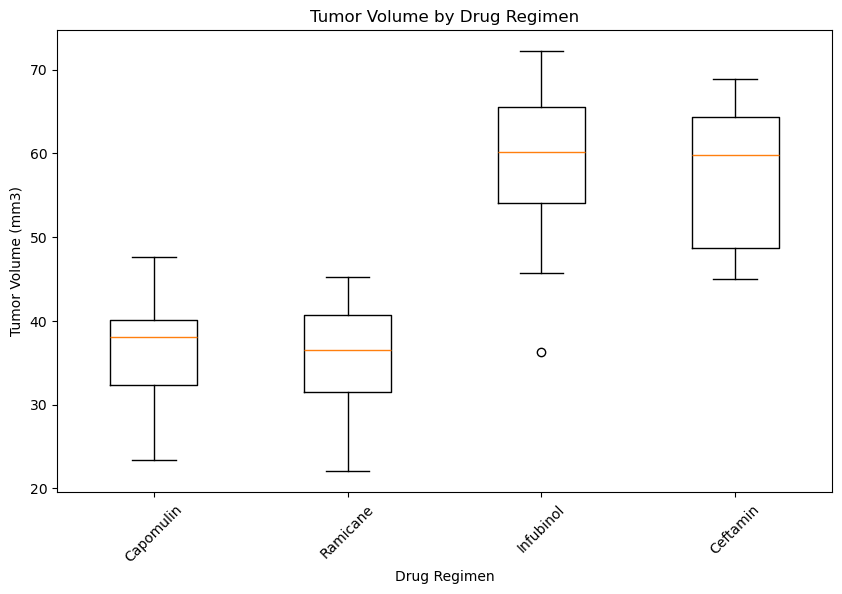

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for treatment in treatments:

    treatment_df = clean_df.loc[clean_df["Drug Regimen"] == treatment]

    max_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
    max_timepoint_merge = pd.merge(treatment_df, max_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')

    final_tumor_vol = max_timepoint_merge["Tumor Volume (mm3)"]
    boxplot_list.append(list(final_tumor_vol.dropna()))


fig = plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_list)
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4], treatments, rotation=45)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

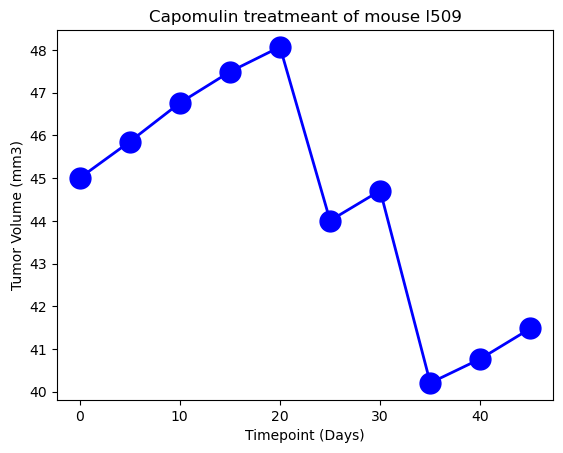

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


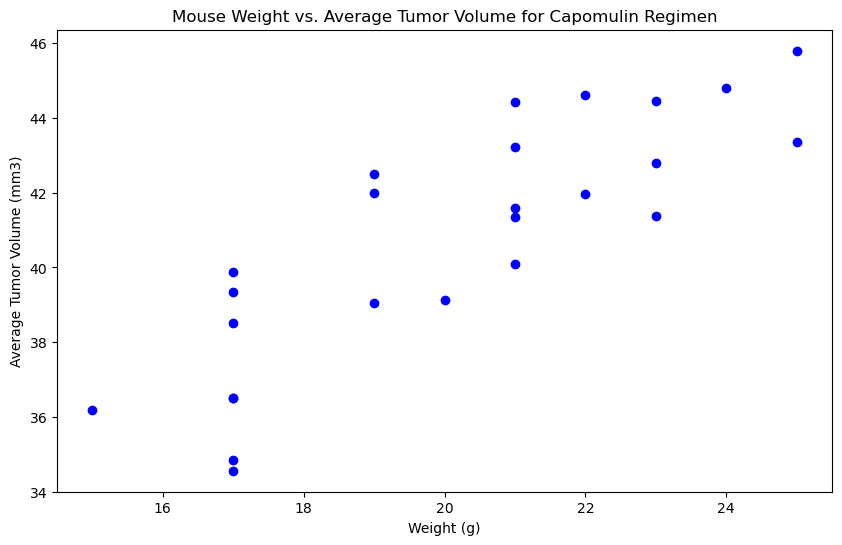

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='blue', alpha=1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

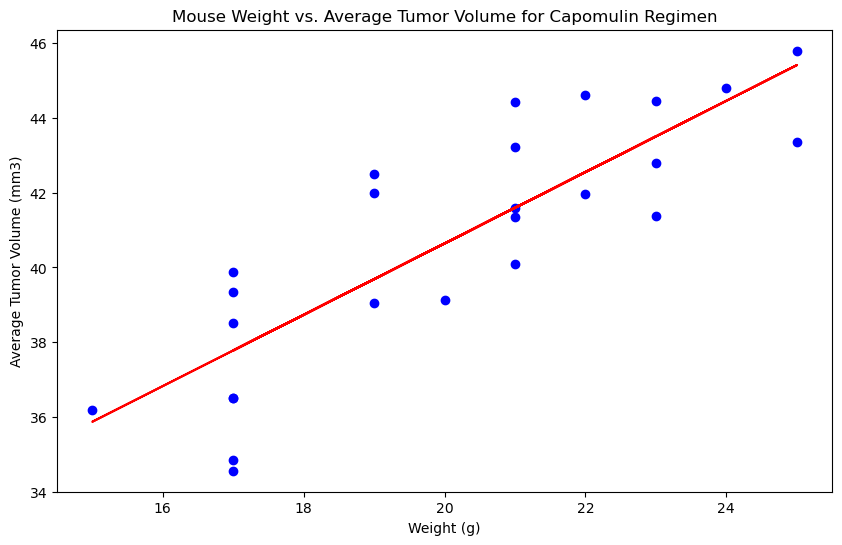

In [63]:

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weights = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()


slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weights, average_tumor_volume)


line_eq = slope * mouse_weights + intercept


plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='blue', alpha=1)
plt.plot(mouse_weights, line_eq, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

plt.show()